Basic Data Preprocessing, along with Encoding and Feature Detection.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import re
import sklearn

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import matplotlib as matplot
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from sklearn.model_selection import train_test_split

In [2]:
train = pd.read_csv(r"C:\Users\rupin\Downloads\NSLKDD improved\KDDTrain+.txt")
test = pd.read_csv(r"C:\Users\rupin\Downloads\NSLKDD improved\KDDTest+.txt")
train.shape
test.shape 
train.columns = range(train.shape[1])
test.columns = range(test.shape[1])
labels = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
'num_access_files', 'num_outbound_cmds', 'is_host_login',
'is_guest_login', 'count', 'srv_count', 'serror_rate',
'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
'dst_host_srv_rerror_rate', 'attack_type', 'difficulty_level']# subclass - > attack_type
combined_data = pd.concat([train, test])
combined_data.shape
combined_data.head(5)

combined_data.columns = labels
combined_data = combined_data.drop('difficulty_level', axis= 1)
combined_data.head(3)

(125972, 43)

(22543, 43)

(148515, 43)

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.0,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.1,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.0,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal


In [3]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

print(set(list(combined_data['attack_type']))) # use print to make it print on single line 
combined_data['attack_type'] = le.fit_transform(combined_data['attack_type'])
combined_data['protocol_type'] = le.fit_transform(combined_data['protocol_type'])
combined_data['service'] = le.fit_transform(combined_data['service'])
combined_data['flag'] = le.fit_transform(combined_data['flag'])

print('\nDescribing attack_type: ')
print("min", combined_data['attack_type'].min())
print("max", combined_data['attack_type'].max())
print("mean", combined_data['attack_type'].mean())
print("mode", combined_data['attack_type'].mode())
print("looks like 16 is 'normal' ")

{'worm', 'land', 'httptunnel', 'snmpgetattack', 'sqlattack', 'mscan', 'phf', 'guess_passwd', 'pod', 'ftp_write', 'warezmaster', 'processtable', 'ps', 'ipsweep', 'buffer_overflow', 'neptune', 'portsweep', 'normal', 'apache2', 'xsnoop', 'teardrop', 'warezclient', 'loadmodule', 'snmpguess', 'named', 'mailbomb', 'perl', 'xterm', 'xlock', 'multihop', 'imap', 'udpstorm', 'saint', 'rootkit', 'smurf', 'spy', 'satan', 'sendmail', 'back', 'nmap'}

Describing attack_type: 
min 0
max 39
mean 15.782244217755782
mode 0    16
Name: attack_type, dtype: int32
looks like 16 is 'normal' 


Feature Elimintation along with dataset split.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Perform feature elimination
corr_matrix = combined_data.corr().abs().sort_values('attack_type')
leastCorrelated = corr_matrix['attack_type'].nsmallest(10)
leastCorrelated = list(leastCorrelated.index)
leastSTD = combined_data.std().to_frame().nsmallest(5, columns=0)
leastSTD = list(leastSTD.transpose().columns)
featureElimination = set(leastCorrelated + leastSTD)
combined_data_reduced = combined_data.drop(featureElimination, axis=1)

# Define the features and target variable after feature elimination
data_x = combined_data_reduced.drop('attack_type', axis=1)
data_y = combined_data_reduced['attack_type']

# Define the number of components for PCA
n_components = 10  # Adjust this number as needed

# Instantiate PCA
pca = PCA(n_components=n_components)

# Fit and transform PCA on the reduced data
X_pca = pca.fit_transform(data_x)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, data_y, test_size=0.5, random_state=42)

# Now X_train and X_test contain the transformed features after PCA,
# and y_train and y_test contain the corresponding labels


Training the Random Forest Classifier Model.

RandomForestClassifier(criterion='entropy', n_estimators=10)

RandomForestClassifier processing...
RandomForestClassifier Score: 0.93


<Figure size 640x480 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver Operating Characteristic (ROC)')

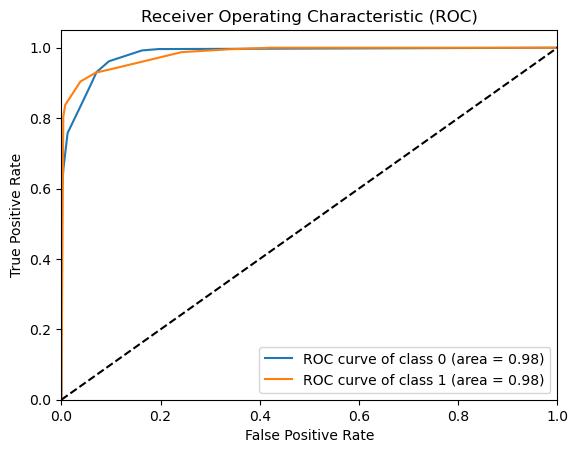

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

# Generate sample data
X, y = make_classification(n_samples=1000, n_classes=2, n_features=10, n_informative=2, n_clusters_per_class=1, random_state=42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Create RandomForestClassifier
RF = RandomForestClassifier(n_estimators=10, criterion='entropy', max_features='sqrt', bootstrap=True)

# Train RandomForestClassifier
RF.fit(X_train, y_train)

# Score RandomForestClassifier
rf_score = RF.score(X_test, y_test)
print('RandomForestClassifier processing...')
print('RandomForestClassifier Score:', rf_score)

# Make predictions on the test data
y_pred = RF.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_pred.shape[1]  # Number of classes based on y_pred
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [6]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=RF, param_grid=param_grid, cv=5)

# Perform grid search
grid_search.fit(X_train, y_train)

# Print the best parameters found by grid search
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
accuracy = best_model.score(X_test, y_test)
print("Accuracy:", accuracy)


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy',
                                              n_estimators=10),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100]})

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy: 0.928


In [7]:
X_test_df = pd.DataFrame(X_test, columns=[f"Feature_{i}" for i in range(X_test.shape[1])])

# Print the DataFrame
print(X_test_df)

     Feature_0  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
0     2.218210  -0.709021  -1.793892  -1.153332  -0.391227   1.637681   
1     0.841023  -1.089633  -0.847634   1.809306  -0.886888   1.245940   
2     0.719914  -1.244486   1.010840  -0.633273   0.980464  -0.405691   
3     0.549020   0.686568   1.366389   0.589639   1.453814  -0.906938   
4    -0.419654   1.221295   1.548639  -1.336569   2.273292  -2.171021   
..         ...        ...        ...        ...        ...        ...   
495  -1.561003   0.520689  -0.237807   0.473145   3.113533  -3.554387   
496   1.574242   0.610216  -0.962733  -0.342549  -0.714525   1.531963   
497   1.410559  -1.615887   0.204759  -0.022300  -0.499035   1.253184   
498   0.156409   0.551964   0.822350  -0.206985   1.225221  -0.944746   
499  -0.246759  -0.900448  -0.822166  -0.451303   2.199165  -2.006449   

     Feature_6  Feature_7  Feature_8  Feature_9  
0     0.918234  -1.687344   1.953259  -1.355448  
1     0.347222  -0.2180

In [8]:
predictions = RF.predict(X_test)

for prediction in predictions:
    if prediction == 0:
        print("Normal")
    else:
        print("Attack")


Normal
Normal
Attack
Attack
Attack
Normal
Attack
Normal
Attack
Normal
Normal
Normal
Normal
Normal
Attack
Normal
Attack
Normal
Attack
Normal
Attack
Attack
Normal
Normal
Attack
Attack
Attack
Normal
Attack
Normal
Attack
Attack
Normal
Normal
Attack
Attack
Attack
Normal
Attack
Attack
Attack
Normal
Attack
Normal
Attack
Attack
Attack
Normal
Normal
Normal
Attack
Normal
Attack
Normal
Attack
Normal
Attack
Attack
Normal
Normal
Normal
Attack
Attack
Normal
Attack
Normal
Normal
Attack
Normal
Normal
Attack
Normal
Attack
Normal
Normal
Normal
Attack
Normal
Attack
Normal
Normal
Normal
Normal
Attack
Attack
Attack
Normal
Attack
Normal
Attack
Normal
Attack
Attack
Normal
Attack
Normal
Normal
Normal
Normal
Attack
Attack
Attack
Normal
Attack
Attack
Normal
Normal
Attack
Normal
Attack
Attack
Normal
Attack
Attack
Attack
Attack
Attack
Attack
Normal
Attack
Attack
Normal
Normal
Normal
Normal
Normal
Normal
Attack
Attack
Normal
Attack
Normal
Normal
Attack
Normal
Normal
Normal
Normal
Attack
Attack
Normal
Normal
Attack

In [9]:
import gradio as gr
import numpy as np

# Define the prediction function
def predict_attack(features):
    try:
        # Split the input string into a list of features
        features_list = features.split()
        # Convert the features to a numpy array
        features_array = np.array(features_list, dtype=float)
        # Reshape the array into a 2D array with a single row
        features_array = features_array.reshape(1, -1)
        # Make predictions using the RandomForestClassifier model
        prediction = RF.predict(features_array)[0]
        # Map prediction to corresponding label
        if prediction == 0:
            return "Normal"
        else:
            return "Attack"
    except:
        return "Invalid input. Please enter numeric features separated by spaces."

# Create a text box for input
textbox = gr.Textbox(placeholder="Enter features separated by spaces", label="Features:")

# Create the Gradio interface with a larger text box and a clear title
iface = gr.Interface(predict_attack, 
                     textbox, 
                     "label", 
                     title="Attack Prediction",
                     description="Enter the features separated by spaces. You will receive a prediction of 'Normal' or 'Attack'.",
                     theme="huggingface")

# Launch the interface
iface.launch()


Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.
